# Aufgabe: Explorative Datenanalyse

### Aufgabe 1.

1. Laden Sie den Census Datensatz mittels Pandas in Ihre Notebook:

In [2]:
import pandas as pd
import os

census = pd.read_csv(os.path.join('..', '..', '..', 'data', 'census.csv'))
census.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'target'],
      dtype='object')

2. Bereiten Sie die Features ordentlich vor:

In [3]:
# Pop the columns:

to_pop = ["occupation", "relationship", "capital-gain", "capital-loss", "native-country", "education", "workclass", "marital-status"]

for col in to_pop:
    census.pop(col)

# Numerische Werte:

sex_dict = {' Male': 1, ' Female': 0}
census["sex"] = census["sex"].replace(sex_dict)

race_dict = {' Asian-Pac-Islander': 4, ' White': 3, ' Black': 2, ' Amer-Indian-Eskimo':1, ' Other': 0}
census["race"] = census["race"].replace(race_dict)

# Sie können noch education oder other Features mitreinnehmen.

target_dict = {' >50K': 1, ' <=50K': 0}
census["target"] = census["target"].replace(target_dict)

census.head()

,age,race,sex,hours-per-week,target
0,39,3,1,40,0
1,50,3,1,13,0
2,38,3,1,40,0
3,53,2,1,40,0
4,28,2,0,40,0


### Aufgabe 2.

1. Führen Sie für die ausgewählten Features eine Häufigkeitsdatenanalyse zusammen:

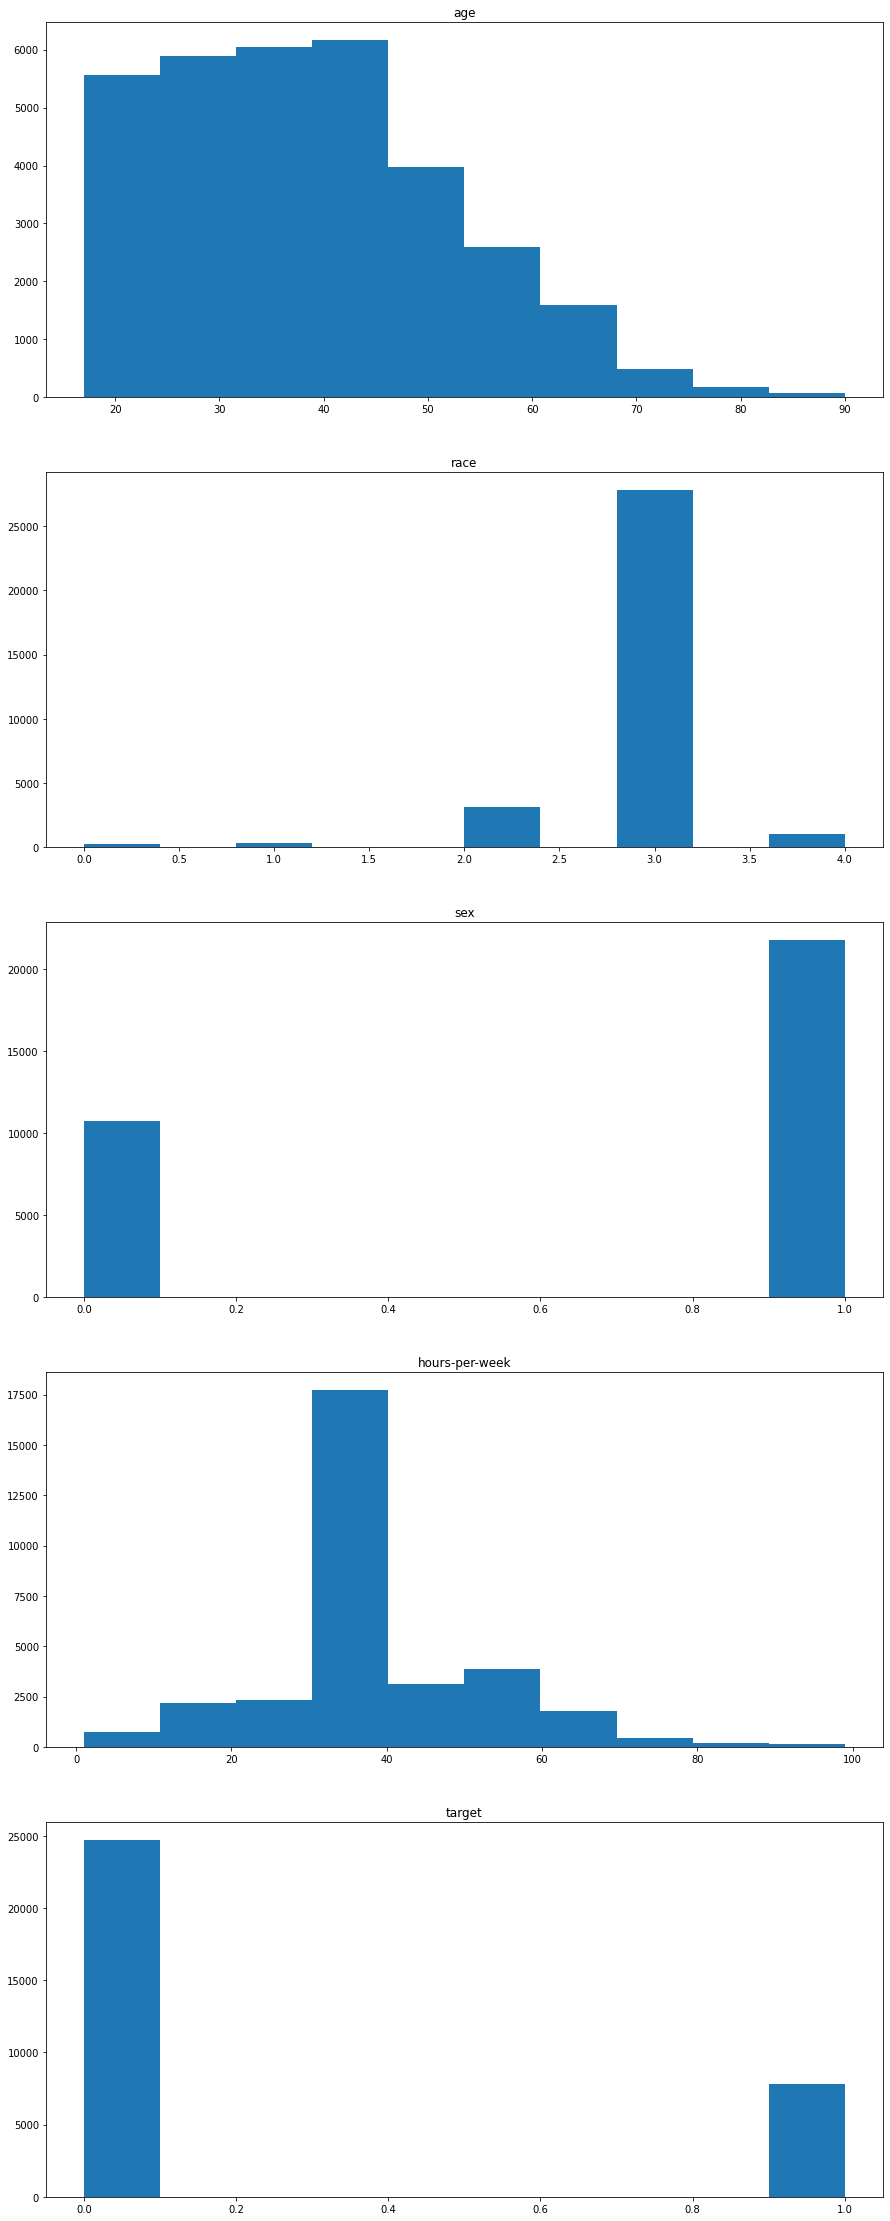

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(census.columns), 1, figsize=(15,40))
for i in range(len(census.columns)):
    axs[i].hist(census[census.columns[i]])
    axs[i].set_title(census.columns[i])

plt.show()

2. Finden Sie Auffälligkeiten im Datensatz. Welches Visualisierungstool könnte dabei hilfreich sein?

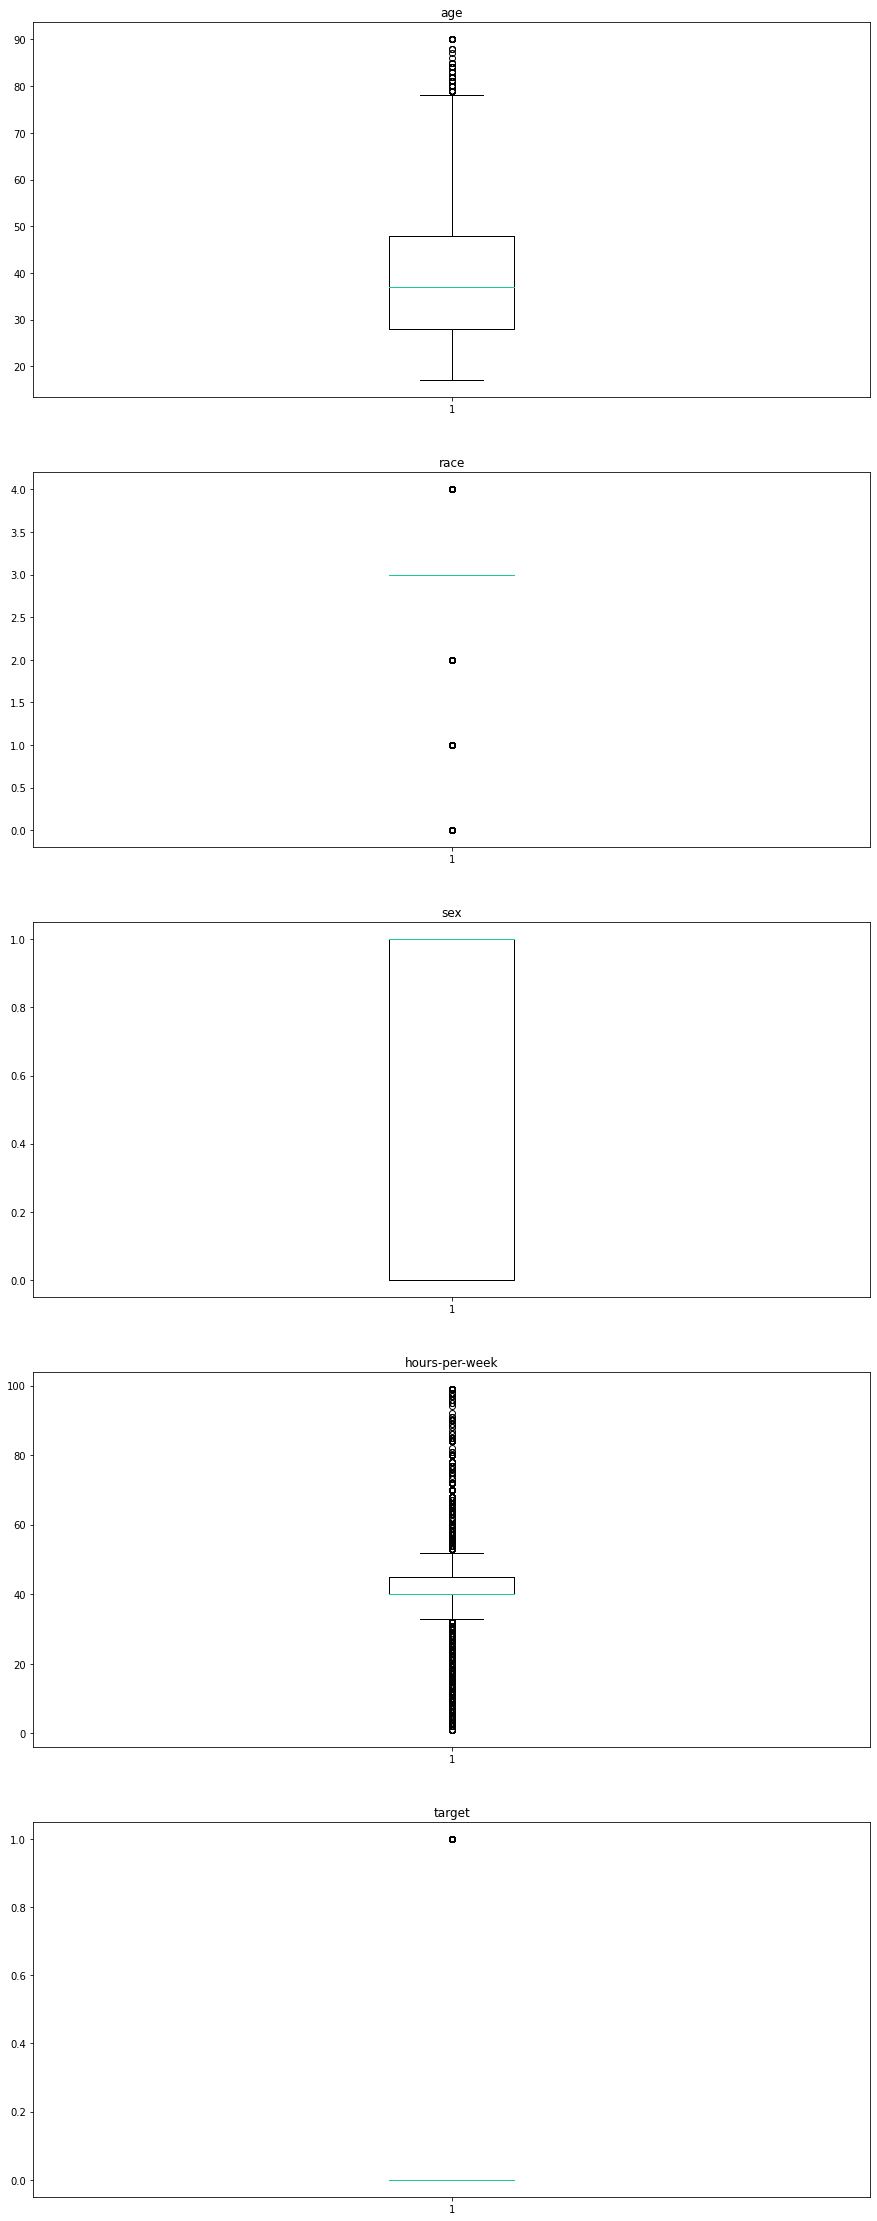

In [5]:
fig, axs = plt.subplots(len(census.columns), 1, figsize=(15,40))

for i in range(len(census.columns)):
    axs[i].boxplot(census[census.columns[i]], medianprops=dict(color="#1ACC94"))
    axs[i].set_title(census.columns[i])

plt.show()

### Aufgabe 3.

1. Führen Sie die Korrelationsanalyse durch. Was können Sie beobachten? Was könnte das Problem sein?

In [6]:
census.corr()

,age,race,sex,hours-per-week,target
age,1.000000,0.031582,0.088832,0.068756,0.234037
race,0.031582,1.000000,0.083102,0.036367,0.088451
sex,0.088832,0.083102,1.000000,0.229309,0.215980
hours-per-week,0.068756,0.036367,0.229309,1.000000,0.229689
target,0.234037,0.088451,0.215980,0.229689,1.000000


2. Finden Sie eine bessere Methode, die Diskriminierung beim Gehalt aufzuzeigen.

In [7]:
# Besserer Weg: straightforward

for race in race_dict:
    census_temp = census[census.race == race_dict[race]]
    grater50 = census_temp[census_temp.target == 1].shape[0]
    print("{}% of{} people earn more than 50K".format(round(grater50/census_temp.shape[0]*100,2), race))

print("-----------------------------------------------------")

for sex in sex_dict:
    census_temp = census[census.sex == sex_dict[sex]]
    grater50 = census_temp[census_temp.target == 1].shape[0]
    print("{}% of{} people earn more than 50K".format(round(grater50/census_temp.shape[0]*100,2), sex))

26.56% of Asian-Pac-Islander people earn more than 50K
25.59% of White people earn more than 50K
12.39% of Black people earn more than 50K
11.58% of Amer-Indian-Eskimo people earn more than 50K
9.23% of Other people earn more than 50K
-----------------------------------------------------
30.57% of Male people earn more than 50K
10.95% of Female people earn more than 50K


### Aufgabe 4.

1. Unterteilen Sie den Datensatz in train/test:

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(census.drop(["target"],axis=1), census["target"])

2. Sagen Sie das Target mit einer trivialen Hypothese vor:

In [9]:
# Hier am besten eine Methode, die die häufigste Klasse findet. Zur Not kann die Klasse auch per Hand eingegeben werden.
def most_frequent_class(y):

    frequent_class = y.mode().iloc[0]

    return frequent_class


prediction_base_rate = [most_frequent_class(y_train)] * len(y_test)

3. Vergleichen Sie die Vorhersage mit y_test mittels einer passenden Metrik.

In [10]:
from sklearn.metrics import accuracy_score

print("Base rate accuracy: {}%".format(round(accuracy_score(prediction_base_rate, y_test)* 100, 2)))

Base rate accuracy: 76.08%
